1.1.1 Привести пример альфы и указать сложность алгоритма и пространственную сложность для нее (по элементно и асимптотическую)

alpha = rank((-1*((1-(open/close**2))**5)))
alpha = normalize(neutralize(alpha))


In [ ]:
"""
alpha = rank( (-1* ( (1-(open/close**2) )**5) ) )
alpha = truncate(alpha, 0.05)
alpha = decay(alpha,10)

При использовании оператора * для умножения двух датафреймов pandas попытается использовать векторизированные операции и избежать циклов
в чистом виде. Это может быть достигнуто благодаря оптимизированным операциям NumPy, на которых основана pandas.

Однако есть случаи, когда векторизация невозможна из-за разных размеров или форматов данных, и в таких случаях могут
использоваться циклы для обработки данных поэлементно.

1. Операция open/close ввиду одинаковой размерность имеет сложность О(mn), где
n - кол-во столбцов (тикеры)
m - количество строк (даты)

Простейшие операции с константами имеют аналогичную сложность. В нашем случае таких операций 5 -> О(5mn)

Функция rank:

def rank_dataframe(dataframe):
    normalized_ranks = dataframe.apply(lambda row: (row.rank() - 1) / (len(row) - 1), axis=1)
    return normalized_ranks

Для каждой строки операция ранжирования .rank() имеет сложность О(m * log(m))
Оперция len имеет линейную сложность O(n), где n - длина строки
Простейшие операции вычитания и деления имеют сложность О(n)

Итого сложность "в скобках" имеет вид O (m * log(m) + 4n)

Для всего датафрейма операция потребует O(n (m * log(m) + 4n) )

Итого сложность строки alpha = rank( (-1* ( (1-(open/close**2) )**5) ) ) будет иметь вид:
   
O(n*(m*log(m) + 4*n) + 5*m*n)

2. Операция нормализации и нейтрализации

def neutralize(alpha) -> pd.DataFrame:
    return (alpha.T - alpha.T.mean()).T
    
def normalize(alpha) -> pd.DataFrame:
    return (alpha.T/alpha.T.abs().sum()).T

Транспонирование, нахождение среднего и простейшие операции в пандас имеют линейную сложность O (m*n)
Сложность нейтрализации = О(5*m*n)
Сложность нормализации = О(6*m*n)

Итоговая сложность построения альфы

O( n*(m*log(m) + 4*n) + 16*m*n)

Ассимптотическая сложность = O(nmlogm + n^2 + mn)

"""

1.1.2. Даны три натуральных числа. Возможно ли построить треугольник с такими сторонами. Если это возможно, выведите строку YES, иначе выведите строку NO. Треугольник — это три точки, не лежащие на одной прямой.

In [ ]:
a = int(input())
b = int(input())
c = int(input())
if (a + b) > c and (a + c) > b and (c + b) > a:
	print("YES")
else: print("NO")

1.1.3. Решите в целых числах уравнение c корнем. Найти все решения или сообщить, что решений в целых числах нет.

In [ ]:
a = int(input())
b = int(input())
c = int(input())

if c < 0:
    print("NO SOLUTION") 
else:
    if a == 0:
        if b == c**2:
            print("MANY SOLUTIONS") 
        else:
            print("NO SOLUTION")
    else:
        D = c**2 - b
        if  D % a == 0:
            x = D // a
            print(x)
        else:
            print("NO SOLUTION")

1.2. Бригада скорой помощи выехала по вызову в один из отделенных районов. К сожалению, когда диспетчер получил вызов, он успел записать только адрес дома и номер квартиры K1, а затем связь прервалась. Однако он вспомнил, что по этому же адресу дома некоторое время назад скорая помощь выезжала в квартиру K2, которая расположена в подъезда P2 на этаже N2. Известно, что в доме M этажей и количество квартир на каждой лестничной площадке одинаково. Напишите программу, которая вычилсяет номер подъезда P1 и номер этажа N1 квартиры K1.

In [ ]:
K1, M, K2, P2, N2 = input().split(" ")
K1 = int(K1)
M = int(M)
K2 = int(K2)
P2 = int(P2)
N2 = int(N2)

if P2 == 1 and N2 == 1:
  if K1 <= K2:
    print("1 1")
  elif M == 1:
    print("0 1")
  elif K1 <= M * K2:
    print("1 0")
  else:
    print("0 0")
elif N2 == 2 and P2 == 1:
    if K2 == 2:
        x = 1
        P1 = K1 // (M * x) + 1
        N1 = (K1 - ((P1 - 1) * x * M)) // x + 1
        print(f"{P1} {N1}")
    elif K2 == 3:
        x = 2
        P1 = K1 // (M * x) + 1
        N1 = (K1 - ((P1 - 1) * x * M)) // x + 1
        print(f"{P1} {N1}")
    else:
        print("-1 -1")
else:
    x = K2 // ((N2 - 1) + M * (P2 - 1))
    if x < 1 or K2 % ((N2 - 1) + M * (P2 - 1)) == 0:
        P1 = -1
        N1 = -1
    elif x == 1:
        P1 = K1 // (M) + 1
        N1 = K1 - (M * (P1-1))
    else:
        P1 = K1 // (M * x) + 1
        N1 = (K1 - ((P1 - 1) * x * M)) // x + 1
    print(f"{P1} {N1}")

1.3. Имеется N кг металлического сплава. Из него изготавливают заготовки массой K кг каждая. После этого из каждой заготовки вытачиваются детали массой M кг каждая (из каждой заготовки вытачивают максимально возможное количество деталей). Если от заготовок после этого что-то остается, то этот материал возвращают к началу производственного цикла и сплавляют с тем, что осталось при изготовлении заготовок. Если того сплава, который получился, достаточно для изготовления хотя бы одной заготовки, то из него снова изготавливают заготовки, из них – детали и т.д. Напишите программу, которая вычислит, какое количество деталей может быть получено по этой технологии из имеющихся исходно N кг сплава.

In [2]:
N, K, M = input().split(" ")
N = int(N)
K = int(K)
M = int(M)

def splav(N, K, M):
    sum_d = 0
    if K > N:
        return 0
    if M > K: 
        return 0
    else:
        while N >= K:
            zakotovki = N // K
            detali = zakotovki * (K // M)
            ostatok = N % K + zakotovki * (K % M)

            N = ostatok
            sum_d += detali
    
    return sum_d

print(splav(N, K, M))

3


1.4. За многие годы заточения узник замка Иф проделал в стене прямоугольное отверстие размером D × E. Замок Иф сложен из кирпичей, размером A × B × C. Определите, сможет ли узник выбрасывать кирпичи в море через это отверстие, если стороны кирпича должны быть параллельны сторонам отверстия.

In [7]:
A = int(input())
B = int(input())
C = int(input())
D = int(input())
E = int(input())

def block_dropper(A, B, C, D, E):
    block_size_sorted = sorted([A, B, C])
    hole_size_sorted = sorted([D, E])

    if block_size_sorted[0] <= hole_size_sorted[0]: # самая маленькая сторона кирпича <= самой маленькой стороны дыры
        if (block_size_sorted[1] <= hole_size_sorted[1] or block_size_sorted[2] <= hole_size_sorted[1]): # хотя бы одна из 2 самых длинных сторон кирпича меньше длинной стороны дыры
            return "YES"
        else:
            return "NO"
    else:
        if block_size_sorted[1] <= hole_size_sorted[0] and block_size_sorted[2] <= hole_size_sorted[1]:
            return "YES"
        else:
            return "NO"
        

print(block_dropper(A, B, C, D, E))


YES


1.5. Даны числа a, b, c, d, e, f. Решить систему линейных уравнений:

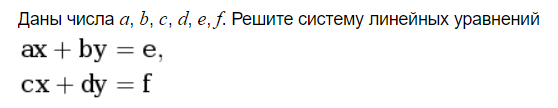

In [14]:
a = float(input())
b = float(input())
c = float(input())
d = float(input())
e = float(input())
f = float(input())


def solution(a, b, c, d, e, f):
    delta = a * d - b * c
    delta_x = e * d - b * f
    delta_y = a * f - c * e
    if delta == 0:
        if a == b == c == d == e == f == 0:
            return 5
        elif a == b == 0 and e != 0:
            return 0
        elif c == d == 0 and f != 0:
            return 0
        elif delta_x == 0:
            if a == c == 0:
                if b == 0:
                    return f"4 {f / d}" 
                else: 
                    return f"4 {e / b}"
            elif b == d == 0:
                if delta_y == 0:
                    if a == 0:
                        return f"3 {f / c}"
                    else:
                        return f"3 {e / a}"
                else:
                    return 0
            else:
                if d == 0:
                    return f"1 {- a / b} {e / b}"
                else:
                    return f"1 {- c / d} {f / d}"
        else:
            return 0
    else:
        return f"2 {delta_x / delta} {delta_y / delta}"
    
print(solution(a, b, c, d, e, f))

0.5
